<a href="https://colab.research.google.com/github/abhi-11nav/Brain-Tumor-Detection-/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection Model - Semantic Segmentation

Dataset credits : https://www.kaggle.com/datasets/nikhilroxtomar/brain-tumor-segmentation

In [1]:
# Importing basic necessary libraries. 

# Visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Cloning the github repository for data

!git clone https://github.com/abhi-11nav/Brain-Tumor-Detection-.git

fatal: destination path 'Brain-Tumor-Detection-' already exists and is not an empty directory.


Visualization

In [3]:
# We will visualize data

# Importing necessary libraries

import cv2

class1 = cv2.imread("/content/Brain-Tumor-Detection-/data/images/10.png")
class2 = cv2.imread("/content/Brain-Tumor-Detection-/data/masks/10.png")

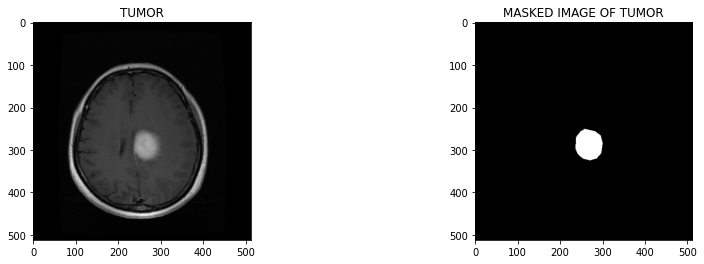

In [4]:
# Visualizing images from two classes

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(class1)
ax1.set_title("TUMOR")

ax2.imshow(class2)
ax2.set_title("MASKED IMAGE OF TUMOR")

plt.subplots_adjust(right=2)

#### Data Augmentation : Image resizing and normlaizing 

DO NOT EXECUTE

```
# This is formatted as code
```



In [5]:
# Path to data directory 

images_path = "/content/Brain-Tumor-Detection-/data/images"

masked_images_path = "/content/Brain-Tumor-Detection-/data/masks"

In [6]:
# Importing necessary libraries

import os
import numpy as np

from glob import glob 
import sklearn

In [7]:
# Loading the dataset

images = sorted(glob(images_path+"/*"))
masks = sorted(glob(masked_images_path+"/*"))

In [8]:
# Let us split the images

from sklearn.model_selection import train_test_split

train_X, valid_X = train_test_split(images, test_size=0.35, random_state=12)
train_y, valid_y = train_test_split(masks, test_size=0.35, random_state=12)

**DO NOT EXECUTE** - For splitting data and defining folder structures 

Folder available on https://github.com/abhi-11nav/Brain-Tumor-Detection-

Defining folder structures for train and test 

In [9]:
! mkdir data

In [10]:
cd /content/data

/content/data


In [11]:
!mkdir train
!mkdir test

In [12]:
cd /content/data/train

/content/data/train


In [13]:
!mkdir images
!mkdir masks

In [14]:
train_X[0]

'/content/Brain-Tumor-Detection-/data/images/2085.png'

In [15]:
import shutil 

for i1, i2 in zip(train_X, train_y):
  shutil.move(i1,"/content/data/train/images")
  shutil.move(i2, "/content/data/train/masks")

In [16]:
cd /content/data/test

/content/data/test


In [17]:
!mkdir images
!mkdir masks

import shutil 

for i1, i2 in zip(valid_X, valid_y):
  shutil.move(i1,"/content/data/test/images")
  shutil.move(i2,"/content/data/test/masks")

In [ ]:
# Zipping the file

!zip -r /content/file.zip /content/data

**UNTIL HERE**

Resizing the images. 

In [19]:
# Loop through every image. normalize it. Reshape it adn sotre in a list. 

# Paths of train and test images

train_path = "/content/Brain-Tumor-Detection-/soreted-data-Large/train"

test_path = "/content/Brain-Tumor-Detection-/soreted-data-Large/test"

In [20]:
# Resizing and scaling
import cv2 
from skimage.transform import resize
from glob import glob

from tqdm import tqdm

# Preprocessing the training images. 

# Empty lists
train_X = []
train_y = []
test_X = []
test_y = []

# Function for preprocessing and appending them into the list

def preprocess(array_name, path, counter):
  for img_path in tqdm(glob(path)):
    # Reading the image into a variable using opencv library
    if counter == 0:
      img = cv2.imread(img_path)
    else:
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # resizing the image
    img = resize(img,(224,224), mode='constant', preserve_range=True)
    img /= 255
    # Appending the preprocessed image to corresponding list. 
    array_name.append(img)


total_paths = [test_path+"/images/*", test_path+"/masks/*"]
total_lists = [test_X, test_y]

counter = 0
for path,array_name in zip(total_paths, total_lists):
  preprocess(array_name,path,counter)
  counter +=1

100%|██████████| 1073/1073 [00:12<00:00, 88.82it/s]


In [28]:
import numpy as np

test_X = np.array(test_X).astype('float64')
test_y = np.array(test_y).astype('float64')

# Expand dimensions for test data
test_y = np.expand_dims(test_y,axis=-1)

In [29]:
# Checking the type 
test_X.dtype

dtype('float64')

DUE TO LIMITED COMPUTATIONAL RESOURCES. I AM TRAINING THE MODEL ON TEST DATA (~ 400 IMAGES). PLEASE FEEL FREE TO TRAIN YOUR MODEL ON TRAIN DATA IF YOU HAVE ENOUGH COMPUTATIONAL RESOURCES

FOR TRAINING THE MODEL ON train_X and train_y

Convert the lists train_X and train_y to numpy arrays using


numpy.array(list_name)

Verification of the split

In [30]:
test_X.shape

(1073, 224, 224, 3)

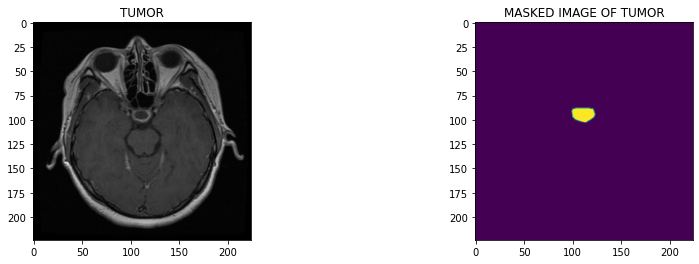

In [31]:
# Visualizing images from two classes

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(test_X[86])
ax1.set_title("TUMOR")

ax2.imshow(test_y[86].squeeze())
ax2.set_title("MASKED IMAGE OF TUMOR")

plt.subplots_adjust(right=2)

This verifies that it is correct. Not so much, but a randomly picked image indexes match. So, this is verifies that the split did not interrupt the order. 

In [32]:
test_y[0].shape

# Each image consists of 3 channels. 

(224, 224, 1, 1)

For the purpose of Semantic Segmentation, we have to have a single channel image in the test set. 

In [33]:
# Verifying the shape

print("X shape: ", test_X.shape,"y shape:",test_y.shape)

X shape:  (1073, 224, 224, 3) y shape: (1073, 224, 224, 1, 1)


Converting the lists to type numpy

#### Semantic Segmentation

We are going to design a convolution neural network similar to U-Net and train it with data to perform semantic segmentation

In [35]:
# Importing necessary libraries

import tensorflow
from tensorflow import keras 

from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Conv2DTranspose, Dropout, Input, concatenate
from keras.models import Model, Sequential

Convolution Neural Network using Functional API 

In [36]:
# Defining a standard input image size 

input_size = [224,224,3]

model = Sequential()

# Convlution layers with a dropout layer in the middle to regularize followed by Maxpool layer
input_layer = Input(shape = input_size)
c1  = Conv2D(filters=64, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(input_layer)
d1 = Dropout(0.18)(c1)
c2 = Conv2D(filters=64, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(d1)
m1 = MaxPool2D(pool_size=(2,2))(c2)

# Convlution layers with a dropout layer in the middle to regularize followed by Maxpool layer
c3 = Conv2D(filters=128, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(m1)
d2 = Dropout(0.18)(c3)
c4  = Conv2D(filters=128, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(d2)
m2 = MaxPool2D(pool_size=(2,2))(c4)

# Convlution layers with a dropout layer in the middle to regularize followed by Maxpool layer
c5 = Conv2D(filters=256, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(m2)
d3 = Dropout(0.18)(c5)
c6 = Conv2D(filters=256, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(d3)
m3 = MaxPool2D(pool_size=(2,2))(c6)

# We will be shooting the size of the image back up until it reaches the original input size from this point 

# Transpose convolutions followd by Nomral convlution layers with a dropout layer in between them
ct1 = Conv2DTranspose(filters=256, kernel_size=2, strides=2)(m3)
ct1 = concatenate([ct1, c6])
c7 = Conv2D(filters=256, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(ct1)
d4 = Dropout(0.18)(c7)
c8 = Conv2D(filters=256, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(d4)

# Transpose convolutions followd by Nomral convlution layers with a dropout layer in between them
ct2 = Conv2DTranspose(filters=128, kernel_size=2,strides=2)(c8)
ct2 = concatenate([ct2, c4])
c9 = Conv2D(filters=128, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(ct2)
d5 = Dropout(0.18)(c9)
c10 = Conv2D(filters=128, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(d5)

# Transpose convolutions followd by Nomral convlution layers with a dropout layer in between them
ct3 = Conv2DTranspose(filters=64, kernel_size=2,strides=2) (c10)
ct3 = concatenate([ct3, c2])
c11 = Conv2D(filters=64, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(ct3)
d6 = Dropout(0.18)(c11)
c12 = Conv2D(filters=64, kernel_size=3, padding="same", kernel_initializer="he_normal", activation="ReLU")(d6)

# Prediction Layer 
prediction = Conv2D(filters=1, kernel_size=1, activation="sigmoid")(c12)

In [37]:
# Builidng the Model

model = Model(inputs = [input_layer], outputs = [prediction])

In [38]:
# Compiling the model

# Custom learning rate
epochs = 5 
learning_rate, decay = 1e-6, 1e-6/epochs
model.compile(optimizer="adam", loss="binary_crossentropy", metrics='accuracy')

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 224, 224, 64  0           ['conv2d[0][0]']                 
                                )                                                             

Fitting the model

In [40]:
history = model.fit(test_X, test_y, epochs=5, batch_size=2,validation_split=0.15)

Epoch 1/5
456/456 [==============================] - 45s 84ms/step - loss: 0.0816 - accuracy: 0.9801 - val_loss: 0.0712 - val_accuracy: 0.9810
Epoch 2/5
456/456 [==============================] - 37s 82ms/step - loss: 0.0697 - accuracy: 0.9813 - val_loss: 0.0678 - val_accuracy: 0.9810
Epoch 3/5
456/456 [==============================] - 37s 80ms/step - loss: 0.0677 - accuracy: 0.9813 - val_loss: 0.0645 - val_accuracy: 0.9810
Epoch 4/5
456/456 [==============================] - 37s 81ms/step - loss: 0.0666 - accuracy: 0.9813 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 5/5
456/456 [==============================] - 36s 80ms/step - loss: 0.0678 - accuracy: 0.9813 - val_loss: 0.0694 - val_accuracy: 0.9810


Perfomance Visualization

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

Testing

In [ ]:
image_path = "/content/Brain-Tumor-Detection-/Sorted_data/data/test/images/1097.png"
masked_image_path = "/content/Brain-Tumor-Detection-/Sorted_data/data/test/masks/1097.png"

In [ ]:
# Plotting actual image and mask 

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(cv2.imread(image_path))
ax1.set_title("TUMOR")

ax2.imshow(cv2.imread(masked_image_path))
ax2.set_title("MASKED IMAGE OF TUMOR")

plt.subplots_adjust(right=2)

In [ ]:
# Predicting the output

# Reading the image
img_to_predict = cv2.imread(image_path)

# Preprocessing the image
img = resize(img_to_predict, (224,224), mode ='constant', preserve_range=True)

img = img/255

# Printing the shape of the image
img.shape

In [ ]:
# plotting the preprocessed image

plt.imshow(img)

In [ ]:
# Expanding dimensions. 

image = np.expand_dims(img,axis=0)
image.shape

In [ ]:
# Feeding image to the model 

predicted_image = model.predict(image, verbose=0)[0]

In [ ]:
predicted_image.shape
predicted_image = np.squeeze(predicted_image, axis=-1)
predicted_image.shape

In [ ]:
predicted_image = (predicted_image>0.4)
predicted_image = predicted_image.astype(np.int32)

In [ ]:
# Plotting the predicted image against actual result

# Plotting actual image and mask 

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(np.squeeze(predicted_image))
ax1.set_title("PREDICTED MASK")

ax2.imshow(cv2.imread(masked_image_path, cv2.IMREAD_GRAYSCALE))
ax2.set_title("ORIGINAL MASK")

plt.subplots_adjust(right=2)